# OpenEye (OE) Iridium

This notebook shows how to assess the quality of an x-ray structure using OpenEye's Iridium functionalities implemented within OESpruce. Iridium analyzes coordinates and electron densities to classify structures into 4 categories, i.e. HT - Highly Trustworthy, MT - Mildly Trustworthy, NT - Not Trustworthy and NA - Not Applicable. Iridium outputs several structural quality descriptors like resolution, Rfree and more. According to their publication (see below), software development and benchmarking should only be performed with high quality structures.

## References

[Iridium publication](https://doi.org/10.1016/j.drudis.2012.06.011)  
[Documentation](https://docs.eyesopen.com/toolkits/python/sprucetk/theory/iridium.html)

## Content

1. Retrieve example data  
2. Make design units  
3. Get Iridium results  

## 1. Retrieve example data

In [1]:
from dockin.oe_docking import get_structure_from_pdb, get_electron_density_from_pdb
structure = get_structure_from_pdb('1jvp')
electron_density = get_electron_density_from_pdb('1jvp')

## 2. Make design units

OpenEye handles protein ligand complexes in form of design units, which hold information about protein and ligand, as well as all iridium results, if an electron density map was provided.

In [2]:
from openeye import oechem, oespruce

fact = oechem.OEAltLocationFactory(structure)
mol = oechem.OEGraphMol()
fact.MakePrimaryAltMol(mol)
    
opts = oechem.OEPlaceHydrogensOptions()
details = oechem.OEPlaceHydrogensDetails()
oechem.OEPlaceHydrogens(mol, details, opts)
    
design_units = list(oespruce.OEMakeDesignUnits(mol, electron_density))

## 3. Get Iridium results

Iridium results can be visualized with a depiction or manually accessed.

In [3]:
# function to visualize iridium results within a jupyter notebook
def iridium_visualization_nb(design_unit):
    """
    Visualize results from OpenEye iridium within jupyter notebooks.

    Parameters
    ----------
    design_unit: str
        Design unit.

    Returns
    -------
    mol: oegrid.OESkewGrid
        An oegrid.OESkewGrid object holding the electron density retrieved from PDB.
    """
    # Standard libraries
    import tempfile
    
    # External libraries
    from IPython.display import SVG, display
    from openeye import oedepict, oegrapheme
    
    with tempfile.NamedTemporaryFile(suffix='.svg') as temp_file:
        image = oedepict.OEImage(250, 250)
    
        oegrapheme.OEDrawIridiumData(image, design_unit)
        oedepict.OEDrawBorder(image, oedepict.OELightGreyPen)
        oedepict.OEWriteImage(temp_file.name, image)
        
        display(SVG(filename=temp_file.name))

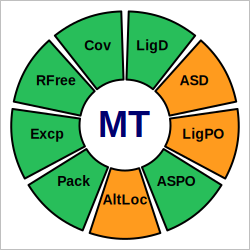

In [4]:
# visualize
iridium_visualization_nb(design_units[0])

In [5]:
# retrieve data manually
iridium_data = design_units[0].GetStructureQuality().GetIridiumData()
print(f'Iridium catagory: {iridium_data.GetCategory()}')
print(f'Resolution: {iridium_data.GetResolution()}')
print(f'Alternate Conformations: {iridium_data.GetAltConfs()}')
print(f'Active site density [0-1]: {iridium_data.GetAsDensity()}')
print(f'Ligand density [0-1]: {iridium_data.GetLigandDensity()}')
print(f'Diffraction-component precision index value: {iridium_data.GetDPI()}')
print(f'Exipients interacting with ligand: {iridium_data.GetExcipients()}')
print(f'Packing residues interacting with ligand: {iridium_data.GetPackingResidues()}')
print(f'Rfree: {iridium_data.GetRFree()}')
print(f'Irrational Rfree: {iridium_data.GetIrrationalRfree()}')
print(f'Has electron density: {iridium_data.GetHasMTZ()}')
print(f'Ligand has partial occupancy: {iridium_data.GetPartOccupancyLigand()}')
print(f'Protein has partial occupancy: {iridium_data.GetPartOccupancyProtein()}')
print(f'Potential covalent ligands: {iridium_data.GetPossibleCovalent()}')

Iridium catagory: 2
Resolution: 1.53
Alternate Conformations: True
Active site density [0-1]: 0.9512195121951219
Ligand density [0-1]: 0.9444444444444444
Diffraction-component precision index value: 0.0985864693471728
Exipients interacting with ligand: False
Packing residues interacting with ligand: False
Rfree: 0.253
Irrational Rfree: False
Has electron density: True
Ligand has partial occupancy: True
Protein has partial occupancy: False
Potential covalent ligands: False
